In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
data = pd.read_csv("Breast_Cancer.csv")
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [75]:
data['Status'].value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

In [76]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [77]:
data["Status"] = data["Status"].map({"Alive":1 , "Dead":0})

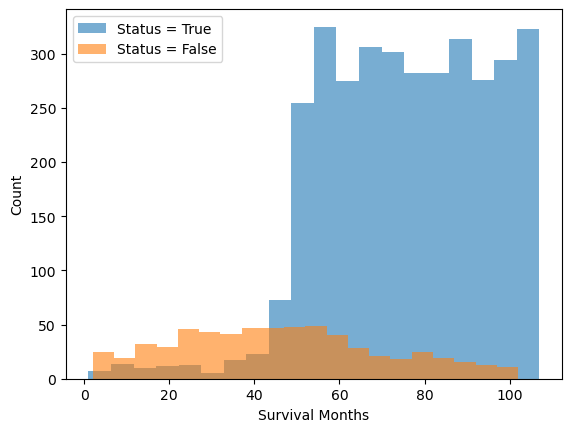

In [78]:
plt.hist(
    data[data["Status"] == True]["Survival Months"],
    bins=20,
    alpha=0.6,
    label="Status = True"
)

plt.hist(
    data[data["Status"] == False]["Survival Months"],
    bins=20,
    alpha=0.6,
    label="Status = False"
)

plt.xlabel("Survival Months")
plt.ylabel("Count")
plt.legend()
plt.show()


In [79]:
data = data.drop(columns=["Survival Months"])

In [80]:
binary_cols = [
    "Estrogen Status",
    "Progesterone Status"
]

for col in binary_cols:
    data[col] = data[col].map({
        "Positive": 1,
        "Negative": 0
    })


In [81]:
print(data.columns.tolist())

['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Status']


In [82]:
print(data["T Stage "].unique())
print(data["Race"].unique())
print(data["Marital Status"].unique())
print(data["6th Stage"].unique())
print(data["differentiate"].unique())
print(data["A Stage"].unique())
print(data["Grade"].unique())
print(data["N Stage"].unique())

['T1' 'T2' 'T3' 'T4']
['White' 'Black' 'Other']
['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
['Regional' 'Distant']
['3' '2' '1' ' anaplastic; Grade IV']
['N1' 'N2' 'N3']


In [83]:
data["N Stage"] = data["N Stage"].fillna("N_missing")

In [84]:
data["Grade"] = data["Grade"].map({
    "1": 1,
    "2": 2,
    "3": 3,
    " anaplastic; Grade IV": 4

})

data["T Stage "] = data["T Stage "].map({
    "T1": 1,
    "T2": 2,
    "T3": 3,
    "T4": 4
})


data["N Stage"] = data["N Stage"].map({
    "N1": 0,
    "N2": 1,
    "N3": 2,
    "N_missing": 3
})

data["6th Stage"] = data["6th Stage"].map({
    "IIA": 1,
    "IIB": 2,
    "IIIA": 3,
    "IIIB": 4,
    "IIIC": 5
})

data["differentiate"] = data["differentiate"].map({
    "Well differentiated": 1,
    "Moderately differentiated": 2,
    "Poorly differentiated": 3,
    "Undifferentiated": 4
})

data["A Stage"] = data["A Stage"].map({
    "Regional": 0,
    "Distant": 1
})



In [85]:
nominal_cols = [
    "Race",
    "Marital Status"
]

for col in nominal_cols:
    data[col] = data[col].astype("category").cat.codes


In [86]:
print(data.isnull().sum())
print(data.dtypes)


Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Status                    0
dtype: int64
Age                       int64
Race                       int8
Marital Status             int8
T Stage                   int64
N Stage                   int64
6th Stage                 int64
differentiate             int64
Grade                     int64
A Stage                   int64
Tumor Size                int64
Estrogen Status           int64
Progesterone Status       int64
Regional Node Examined    int64
Reginol Node Positive     int64
Status                    int64
dtype: object


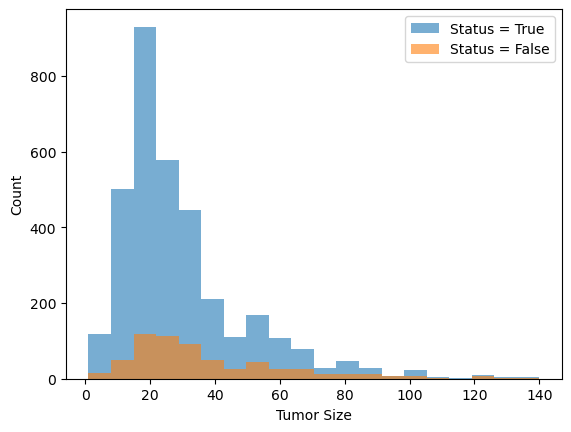

In [87]:
plt.hist(
    data[data["Status"] == True]["Tumor Size"],
    bins=20,
    alpha=0.6,
    label="Status = True"
)

plt.hist(
    data[data["Status"] == False]["Tumor Size"],
    bins=20,
    alpha=0.6,
    label="Status = False"
)

plt.xlabel("Tumor Size")
plt.ylabel("Count")
plt.legend()
plt.show()


In [88]:
class Node():
    def __init__(self,feature_index=None,threshold=None,left=None,right=None,info_gain=None,value=None):
        # Decision_Node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # Leaf_Node
        self.value = value

In [ ]:
class Decision_Tree_Classifier():
    def __init__(self, max_depth = 3, min_sample_split = 2):
        self.max_depth = max_depth
        self.min_sample_split = min_sample_split

        self.root = None


    def build_tree(self, dataset, curr_depth=0):
        X = dataset[:, :-1]
        y = dataset[:, -1]
        num_samples, num_features = X.shape

        if (self.max_depth>=curr_depth and num_samples>= self.min_sample_split):
            best_split = self.get_best_split(dataset, num_samples, num_features)

            if(len(best_split) > 0 and best_split["info_gain"]>0):
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)

                return Node(best_split["feature_index"], best_split["threshold"], left_subtree, right_subtree, best_split["info_gain"])
            
        leaf_value = self.calculate_leaf_value(y)
        return Node(value = leaf_value)
    
    
    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_info_gain = - float('inf')

        for feature_index in range(num_features):
            feature_values = dataset[:,feature_index]
            possible_threshold = np.unique(feature_values)

            for threshold in possible_threshold:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if (len(dataset_left)>0 and len(dataset_right)>0):
                    y, left_y, right_y = dataset[:, -1],dataset_left[:, -1], dataset_right[:, -1]
                    info_gain = self.info_gain(y, left_y, right_y)
                    if(info_gain>max_info_gain):
                        best_split["threshold"] = threshold
                        best_split["feature_index"] = feature_index
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = info_gain
                        max_info_gain = info_gain
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        left_mask = dataset[:, feature_index] <= threshold
        right_mask = dataset[:, feature_index] > threshold
        dataset_left = dataset[left_mask]
        dataset_right = dataset[right_mask]

        return dataset_left, dataset_right
    
    def info_gain(self, parent, l_child, r_child, mode = "entropy"):
        weight_l = len(l_child)/len(parent)
        weight_r = len(r_child)/len(parent)

        if(mode == "entropy"):
            info_gain = self.entropy(parent) - (weight_l * self.entropy(l_child) + weight_r * self.entropy(r_child))
        else:
            info_gain = self.gini_index(parent) - (weight_l * self.gini_index(l_child) + weight_r * self.gini_index(r_child))
        
        return info_gain
    
    def entropy(self, y):
        class_labels = np.unique(y)
        ent = 0
        for cls in class_labels:
            n_cls = len(y[y==cls])
            p = n_cls/len(y)
            ent -= p*np.log2(p)
        return ent
    
    def gini_index(self, y):
        class_labels = np.unique(y)
        gini = 1
        for cls in class_labels:
            n_cls = len(y[y==cls])
            p = n_cls/len(y)
            gini += np.square(p)
        return gini
    
    def calculate_leaf_value(self, y):
        y = list(y)
        return max(y, key= y.count)
    
    def fit(self, X, y):
        dataset = np.concatenate((X,y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        predictions = [self.predictions(x, self.root) for x in X]
        return predictions

    def predictions(self, X, tree):
        if tree.value != None :
            return tree.value
        feature_val = X[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.predictions(X, tree.left)
        else:
            return self.predictions(X, tree.right)
        
    



In [90]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1,1)

In [91]:
split_length = int(0.8*X.shape[0])
X_train, X_test = X[:split_length], X[split_length:]
y_train, y_test = y[:split_length], y[split_length:]

In [92]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 41)

In [93]:
model = Decision_Tree_Classifier(min_sample_split = 3, max_depth = 4)

In [94]:
model.fit(X_train,y_train)

In [95]:
y_pred = model.predict(X_test)

In [96]:
def accuracy_score(y_true, y_pred):
    return np.mean((y_true==y_pred))

In [97]:
accuracy_score(y_test, y_pred)

0.8346745881717527